<a href="https://colab.research.google.com/github/imvickykumar999/ARIMA-Temperature_Forecasting/blob/master/Stock_price_prediction_model_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Description : This program uses Artificial Recurrent Neural Network called Long Short Term Memory (LSTM) to predict the closing stock price 
##                of a corporation (Apple inc.) using the past 60 days stock price.                  

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use ('fivethirtyeight')


In [ ]:
# get the stock quote 

df = web.DataReader('AAPL',data_source ='yahoo', start = '2012-01-01', end = '2019-12-17')

# show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.899139
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.069626
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.981300


In [ ]:
# get the number of rows and columns of the dataset 
df.shape

(2003, 6)

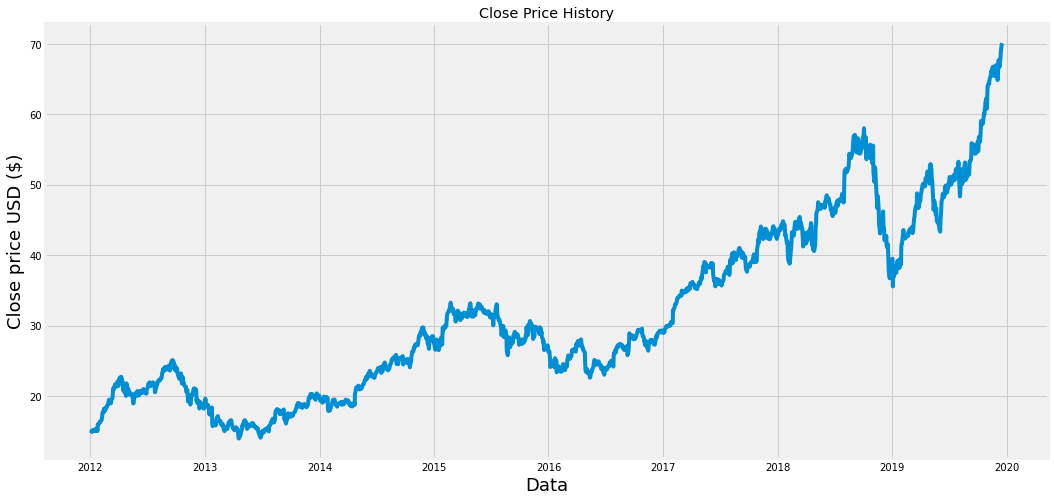

In [ ]:
# Visualize the closing price history
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Close price USD ($)', fontsize = 18)
plt.show()

In [ ]:
## graph trends are showing increased apple closing prices which is a good trend 

In [ ]:
# Create a new dataframe with only Close column
data = df.filter(['Close'])
# Convert a dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1603

In [ ]:
# Scale the data
# The preprocessing is required before you feed the data to the neural network
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# the scaled data would range between 0-1 both inclusive
scaled_data


array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [ ]:
# Create the training dataset
# Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]

# Splitting the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
# the y_train value consists the 61st value = 0.13949...
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [ ]:
# Convert the x_train and y_train into numpy array 
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data because the LSTM excepts the data to be 3 dimensional in the form of no. of sample, no. of timestamps and no. of features
# only 1 feature that is closing
x_train = np.reshape(x_train, ( x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [ ]:
# Build the LSTM model
model = Sequential()
# Adding the 1st LSTM layer
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# Adding the 2nd LSTM layer
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 35s 18ms/step - loss: 7.1504e-04


In [ ]:
# Create the testing data set
# Create a new array containing scald values from 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
# Create the x_test and y_test data set
x_test = []
y_test = dataset[training_data_len:, :]    # y_test will be all of the values that we want our model to predict
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data into a numpy array to use it the LSTM cell
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  # 1 is the number of feature that is Close price


In [ ]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # we are unscaling the values to get the same values as our y_test dataset


In [ ]:
# Evaluate the model ... Get the root mean square (RMSE) of the model

rmse = np.sqrt(np.mean( predictions - y_test) ** 2)
rmse



2.0941399574279784

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


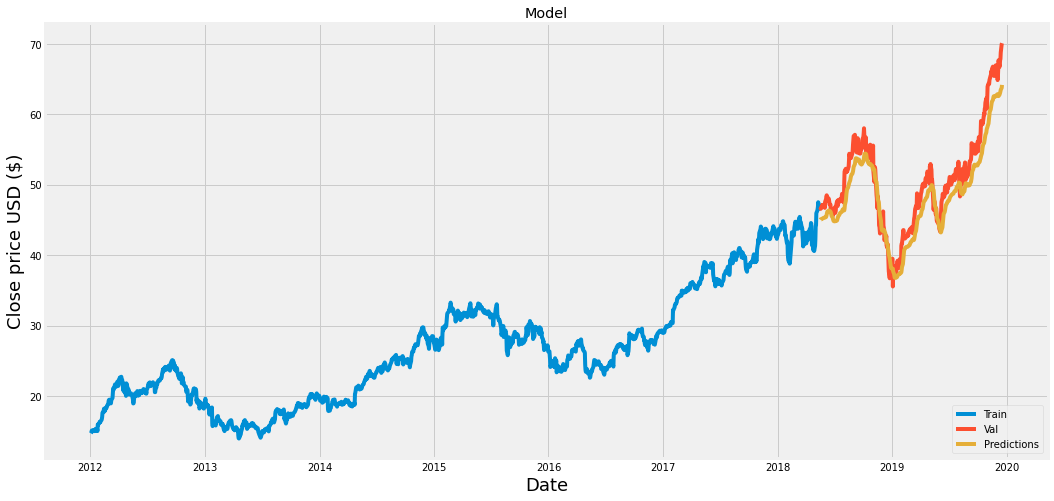

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [ ]:
# the orange lines denotes the actual data or closing stock price for Apple inc. for the rest of the days
# the yellow is for predictions

In [ ]:
# Show the valid/actual and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,45.025604
2018-05-18,46.577499,45.095428
2018-05-21,46.907501,45.109760
2018-05-22,46.790001,45.137264
2018-05-23,47.090000,45.154152
...,...,...
2019-12-11,67.692497,63.069805
2019-12-12,67.864998,63.265823
2019-12-13,68.787498,63.472958


In [ ]:
valid['Predictions'].median()

48.487789154052734

In [ ]:
valid['Close'].median()

50.2137508392334

In [ ]:
# Get the Quote
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2019-12-17')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 day closing price value and convert the dataframe into array
last_60_days = new_df[-60:].values
# Scale the values to be between 0 and 1 
last_60_days_scaled = scaler.transform(last_60_days)                           # we aren't using fit transform to use the min and max values
# Create an empty list
X_test = []
# Append the last 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test dataset into a numpy array
X_test = np.array(X_test)
# Reshape the data to be used in LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[64.59602]]


In [ ]:
# this is the predicted price by our model for 12-18-2019 

In [ ]:
# Now let's check the actual price 
apple_quote2 = web.DataReader('AAPL', data_source = 'yahoo', start = '2019-12-18', end = '2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
